<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [3]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [4]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [5]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [6]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [7]:
boston_df.rename(columns={'Unnamed: 0': 'N'})

,N,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


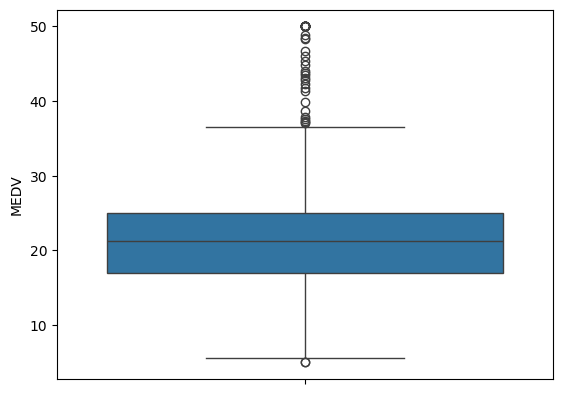

In [8]:
#For the "Median value of owner-occupied homes" provide a boxplot
import seaborn as sns

stat_value_MEDV=boston_df['MEDV'].describe()
MEDV_BoxPlot = sns.boxplot(y ="MEDV",data=boston_df)

Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [9]:
age_categories = ["younger than 35","between 35 and 70","over70"]


#discretization in three groups of AGE variable
less_35 = boston_df.loc[(boston_df['AGE']<=35)] #groups of <=35 years

between_35_70 = boston_df.loc[(boston_df['AGE']>35) & (boston_df['AGE']<70)]

over_70 = boston_df.loc[(boston_df['AGE']>=70)]

less_35_MEDV=less_35['MEDV']

between_35_70_MEDV=between_35_70['MEDV']

over_70_MEDV=over_70['MEDV']

In [10]:
combined_dfs = pd.DataFrame({'MEDV less than 35': less_35_MEDV,
                             'MEDV 35 to 70': between_35_70_MEDV,
                             'MEDV over 70': over_70_MEDV})

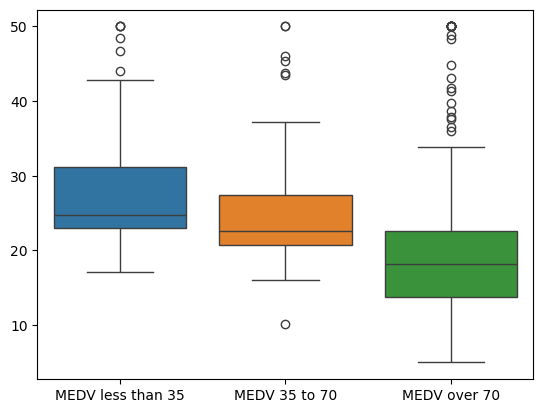

In [10]:
#Create box plot with combined dfs
MEDV_BoxPlot = sns.boxplot(data=combined_dfs, width=0.8)

Bar plot with Charles river variable

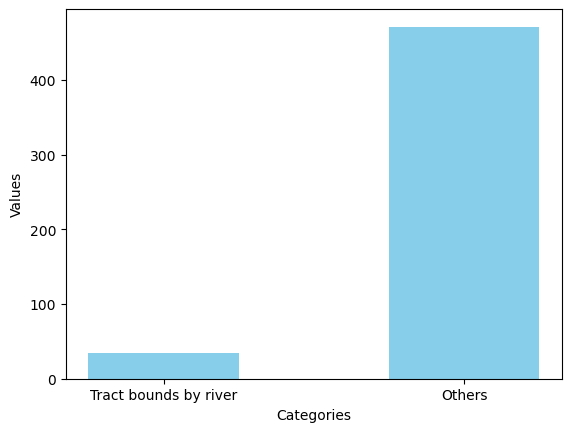

In [11]:
import matplotlib.pyplot as plt

#Count the number of tract bounds by river Charles
tract_bounds_river=(boston_df['CHAS'] == 1).sum()
no_bounds_river=(boston_df['CHAS'] == 0).sum()

#Create bar plot
categories = ["Tract bounds by river", "Others"]
values = [tract_bounds_river, no_bounds_river]

plt.bar(categories,values,color='skyblue', width=0.5)

plt.xlabel('Categories')
plt.ylabel('Values')
plt.show()

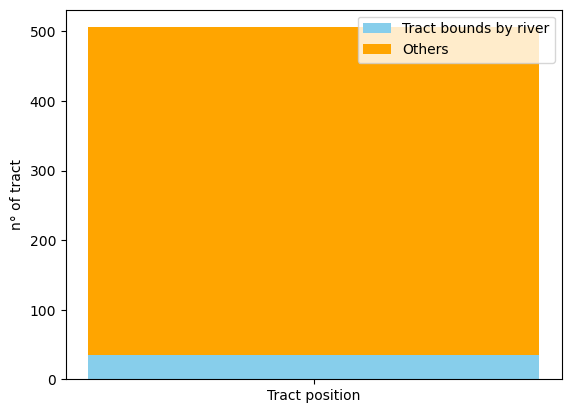

In [12]:
import numpy as np

# Set the width of the bars
categories2=['Tract position']

width = 0.3
width2 = 0.3

plt.bar(categories2,tract_bounds_river,color='skyblue', label='Tract bounds by river')
plt.bar(categories2,no_bounds_river,bottom=tract_bounds_river, color='orange',label='Others')

plt.ylabel('n° of tract')

# Add a legend
plt.legend()

plt.show()

Scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town

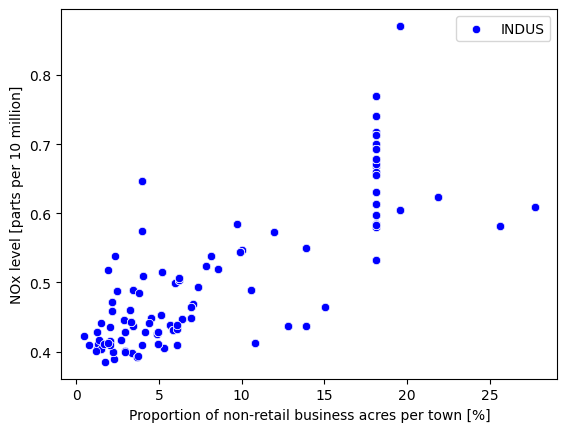

In [14]:
sns.scatterplot(x=boston_df['INDUS'], y=boston_df['NOX'], color='blue', marker='o', label='INDUS')

plt.ylabel('NOx level [parts per 10 million]')
plt.xlabel('Proportion of non-retail business acres per town [%]')

plt.show()

There is an increase in NOx level at increasing of portion of non-retail business acres per town

Create a histogram for the pupil to teacher ratio variable

Text(0, 0.5, 'Frequency [-]')

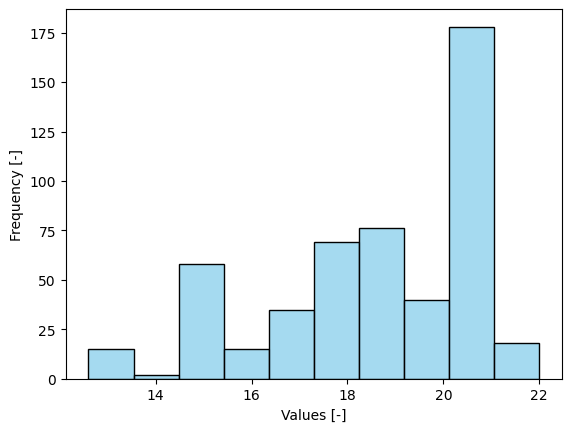

In [14]:
sns.histplot(boston_df['PTRATIO'], bins=10, color='skyblue', edgecolor='black')

plt.xlabel('Values [-]')
plt.ylabel('Frequency [-]')

Task 3: Use the appropriate tests to answer the questions provided.

1)Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

H0: there is no significant difference between the median value of the houses bounded by the Charles river or not

H1: There is significant difference between median value of the houses bounded by the Charles river or not

In [15]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],boston_df[boston_df['CHAS'] == 0]['MEDV'])


TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

Result: P-value < 0.05 --> reject null hypothesis, so there is significant difference

2) Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

H0: there is no difference in MEDV for each proportion of owner occupied unit built prior to 1940

H1: there is statisticale difference in MEDV for each proportion of owner occupied unit built prior to 1940

In [16]:
#H0: there is no difference in MEDV for each proportion of owner occupied unit built prior to 1940
#H1: there is statisticale difference in MEDV for each proportion of owner occupied unit built prior to 1940


f_statistic, p_value = scipy.stats.f_oneway(less_35_MEDV,between_35_70_MEDV,over_70_MEDV)
print("F_statistic:{0}, P_value:{1}".format(f_statistic, p_value))


F_statistic:36.40764999196599, P_value:1.7105011022702984e-15


Result: P-value < 0.05 --> reject null hypothesis, so there is a statistical difference

3) Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

H0: there is a relationship between NOx conventration and proportion of non-retail buiness acres per town

H1:  there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

In [17]:
scipy.stats.pearsonr(boston_df['NOX'],boston_df['INDUS'])


PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

p-value<0.05 --> there is a correlation between NOX and INDUS

4) What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

H0 = there is no impact of additional weighted distance to five Boston employment centers on median values of owner occupied homes

H1 = there is no impact of additional weighted distance to five Boston employment centers on median values of owner occupied homes

In [18]:
import statsmodels.api as sm

#declaring variables
x = boston_df['DIS']
y = boston_df['MEDV']

#add intercept to the model
x = sm.add_constant(x)

model = sm.OLS(y,x).fit()

prediction = model.predict(x)

model.summary()

#P-value < 0.05 --> there is a correlation between average value and weighted distance to five Boston employment centers

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 01 Mar 2024   Prob (F-statistic):           1.21e-08
Time:                        11:22:44   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

P-value < 0.05 --> there is a correlation between average value and weighted distance to five Boston employment centers